In [3]:
import numpy as np

In [5]:
#Part 1
def roll_dice():
    #Simulation of rolling a dice twice,minimun number we get is 1, max is 6
    #Add the results of the two simulations , so possible values will be:
    #(1,1) or (1,2)...(6,6)...Sum will be between 2 and 12
    #Run multiple times to verify

    return np.sum(np.random.randint(1,7,2))
    #Generate an array of 2 random integers between 1 and 6 (both inclusive) and add them
print(roll_dice())
    

10


In [10]:
#Part 2
#Someone approaches us saying I will give you 5 dollars if you get 7
#and take 1 dollar if you get a number other than 7
#How do we know what will happen?
#Our own "Monte Carlo Simulation" like function
def monte_carlo_simulation(runs=1000):
    results = np.zeros(2) #An array , results[0] and results[1] initalized to two zeroes
    for _ in range(runs):
        if roll_dice()==7:
            results[0] +=1
        else:
            results[1]+=1
    return results
#Test 2-3 imes and calculate how much you will win versus lose
print(monte_carlo_simulation())
print(monte_carlo_simulation())
print(monte_carlo_simulation())
#Results may be favourable to us , but was that by luck?

[154. 846.]
[149. 851.]
[181. 819.]


In [13]:
#Part 3 
#Now do it 1000 times
#Takes some time
results=np.zeros(1000)

for i in range(1000):
    results[i]=monte_carlo_simulation()[0]

print(results)

[167. 167. 157. 174. 176. 161. 155. 167. 151. 152. 161. 159. 161. 154.
 190. 160. 175. 153. 169. 166. 170. 169. 157. 167. 158. 163. 184. 172.
 161. 158. 171. 167. 172. 172. 182. 145. 177. 155. 174. 174. 176. 137.
 175. 182. 171. 170. 175. 171. 178. 151. 158. 185. 178. 165. 172. 181.
 156. 149. 166. 141. 172. 171. 168. 167. 174. 160. 181. 170. 181. 184.
 164. 155. 182. 200. 152. 181. 182. 160. 167. 174. 168. 160. 186. 172.
 160. 150. 176. 161. 180. 161. 181. 194. 175. 170. 171. 177. 161. 154.
 169. 169. 161. 152. 188. 180. 174. 164. 173. 147. 150. 177. 160. 168.
 144. 161. 160. 150. 153. 192. 160. 180. 173. 140. 206. 179. 158. 177.
 179. 171. 176. 161. 172. 161. 170. 177. 164. 169. 129. 173. 144. 168.
 168. 153. 184. 159. 164. 171. 160. 172. 173. 182. 166. 160. 163. 159.
 179. 202. 188. 160. 173. 177. 160. 156. 156. 175. 163. 175. 162. 149.
 171. 173. 178. 167. 176. 171. 172. 142. 161. 169. 162. 157. 148. 168.
 168. 148. 155. 176. 176. 187. 152. 165. 172. 143. 156. 177. 177. 150.
 166. 

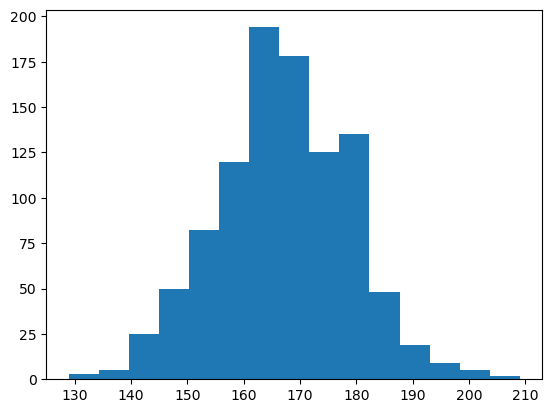

In [14]:
#Let us plot it 
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
ax.hist(results,bins=15)
plt.show()

In [15]:
#Our win/loss
print(results.mean()) #General mean
print(results.mean()*5) #What we will get as win on an average
print(1000 -results.mean()) #What we will pay on an avg
print(1000 -results.mean()*4.75) #Just a marginal change in win reward-see the impact
print(1000 - results.mean()) #What we will pay on an average 
print(results.mean()/1000) #Probablity of the 'we will win' result

166.936
834.6800000000001
833.064
207.05399999999997
833.064
0.166936


So, we will win on an avg : 5 x 166.936 = 833.12
We will lose : 1000 -166 = 791.46
Net win/loss = 833 - 791 = $42         

### Financial Investment

In [16]:
### Financial investement modeling using Monte Carlo
#Investment parameters
investment=100000 #investing 1 lakh
num_years=20 #for 20 years
stock_weight=0.6 #60%in stocks/shares
bond_weight=0.4 #40% bonds/fixed deposits

In [17]:
#return and standard deviation for stocks and bonds
stock_return=0.15 #15%per year, high returns
stock_sd=0.60
bond_return=0.07
bond_sd=0.05

In [20]:
#Number of simulations
iterations=5555


In [21]:
#Simulate random returns for stocks and bonds
#np.random.normal
#for each year of the investment horizon in each simulation 
#Arguments:mean(average returns),standard deviation(volatility)
#simulation size(number of years and simulation)
#stock_returns and bond_returns will be 5555*20 arrays
stock_returns=np.random.normal(stock_return,stock_sd,(iterations,num_years))
bond_returns=np.random.normal(bond_return,bond_sd,(iterations,num_years))

In [22]:
print(stock_returns)
print(bond_returns)
total_returns_pct=((stock_weight*stock_returns)+(bond_weight*bond_returns))*100

[[-0.20720484 -0.30482325 -0.30215515 ...  0.50152821 -0.95032815
  -0.79518497]
 [-0.47367037  0.24107859  0.44838442 ...  0.0099208   0.81407662
   0.20015989]
 [ 0.21512053  0.12989058  0.06765803 ...  0.1771418  -0.19247434
   0.28050666]
 ...
 [ 1.31109639 -0.23697736 -0.85657109 ...  0.28681158  0.75536677
   0.11699401]
 [ 0.39214746 -0.25898953  0.12555575 ...  0.27503086 -0.04018272
  -0.02102428]
 [ 0.58108737 -0.30901471 -0.30355585 ... -0.32528302  0.12652367
   0.37816118]]
[[ 0.07641759  0.10288258  0.08342839 ...  0.08471801  0.10024905
   0.04741265]
 [ 0.08299128  0.02512601  0.18068699 ...  0.15984689  0.05317556
   0.11430521]
 [-0.00576556  0.05853206  0.02492146 ...  0.01049452 -0.01529653
   0.17644306]
 ...
 [ 0.04395942  0.06256005  0.01058112 ...  0.04703131  0.12388888
   0.05125125]
 [ 0.08356206  0.11194388 -0.02076604 ...  0.06096724  0.04188043
   0.04375294]
 [ 0.06257054  0.01112311  0.0699696  ...  0.08800043  0.12976273
   0.13359084]]


In [25]:
#supress scientific notation for NumPy arrays
np.set_printoptions(suppress=True)
print(total_returns_pct)

[[ -9.37558653 -14.17409176 -14.79217334 ...  33.48041307 -53.009727
  -45.81459203]
 [-25.10057108  15.46975547  34.13054509 ...   6.98912406  50.97161968
   16.581802  ]
 [ 12.67660939  10.13471726   5.05634053 ...  11.04828894 -12.16032179
   23.88812224]
 ...
 [ 80.42416029 -11.71623961 -50.9710207  ...  19.08994742  50.27756131
    9.06969041]
 [ 26.87133021 -11.0616165    6.70270353 ...  18.94054139  -0.73574609
    0.4886608 ]
 [ 37.36806398 -18.09595829 -15.414567   ... -15.99696409  12.78192965
   28.03330457]]


In [27]:
#Create a 5555*20 array that will store cummulative investment values
#Example: Consider portofolio_values[0][0]
#Suppose the total  returns for the first 5 out of 20 years were 15%, 0%, -2%,59% and 7%
#portfolio_values[0][0]=100000*(1+0.15)=100000*1.5=115000
#portfolio_values[0][1]=115000*(1+0.15)=115000*1.5=172500
portfolio_values=investment*(1+(total_returns_pct/100)).cumprod(axis=1)
print("***Portfolio Values***")
print(portfolio_values)

***Portfolio Values***
[[  90624.41346743   77779.2259483    66273.98802207 ...  288527.95384584
   135580.07319631   73464.61579369]
 [  74899.4289169    86486.18742133  116004.39461723 ...   -1954.63104851
    -2950.93815266   -3440.25687416]
 [ 112676.60939433  124096.06517502  130370.78482037 ...  154418.60827126
   135640.80860181  168042.85076469]
 ...
 [ 180424.16029322  159285.2333605    78095.92409505 ...  621301.56832098
   933676.84526566 1018358.44457881]
 [ 126871.33020668  112837.31021061  120400.46058726 ...  117418.01202195
   116554.11359445  117123.66785393]
 [ 137368.06398477  112509.99642045   95167.0676457  ...   86283.58605799
    97312.29332979  124592.144902  ]]


In [28]:
#Calculate final portifolio value statistics
final_values=portfolio_values[:,-1]
print(f"Summary of final portfolio values after {num_years} years.")
print(f"Mean:{final_values.mean():.2f}")
print(f"Standard Deviation:{final_values.std():.2f}")

Summary of final portfolio values after 20 years.
Mean:941459.66
Standard Deviation:2563341.77


In [31]:
#Calculate percentiles (25th,50th,100th percentiles)
percentiles=np.percentile(final_values,[25,50,100])
print(f"\nPercentiles of final Portfolio values")
print(f"25th percentile :{percentiles[0]:.2f}")
print(f"50t percentile :{percentiles[1]:.2f}")
print(f"100th percentile :{percentiles[2]:.2f}")



Percentiles of final Portfolio values
25th percentile :82567.88
50t percentile :277154.09
100th percentile :88572626.38


### Financial Investment Eg 2

In [36]:
#Parameters 
initial_investment=1000000 #Investment amount in dollars
success_rate=0.01 #Probability of a successful outcome (1%)
failure_loss =0.5
success_multiplier=1000000 #Multiplier on investment if successful
num_simulations=10000

In [38]:
#Monte Carlo Simulations\
final_values=[]
for _ in range(num_simulations):
    #Simulate whether the startups succeeds (1 if success, 0 otherwise)
    success=np.random.choice([1,0],p=[success_rate,1-success_rate])
    if success:
        final_value=initial_investment * success_multiplier
    else:
        final_value=initial_investment *(1-failure_loss)
    final_values.append(final_value)

#Results
mean_final_value = np.mean(final_values)
risk_of_loss = np.mean(np.array(final_values) < initial_investment)

print(f"Mean Final Value:${mean_final_value:.2f}")
print(f"Probability of Loss:{risk_of_loss * 100:.2f}%")

Mean Final Value:$9000495500.00
Probability of Loss:99.10%


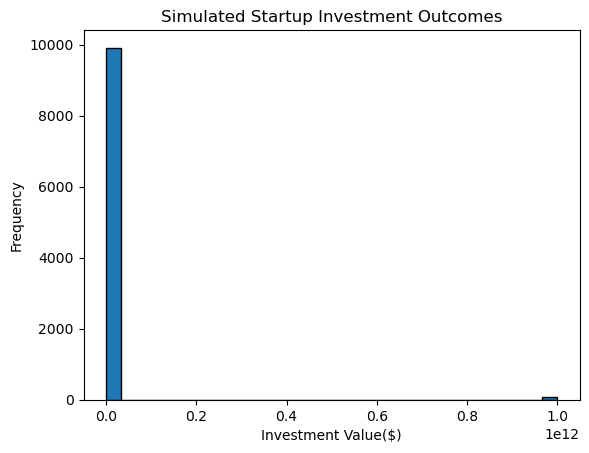

In [40]:
#Plotting the distribution
plt.hist(final_values, bins=30, edgecolor='k')
plt.title('Simulated Startup Investment Outcomes')
plt.xlabel('Investment Value($)')
plt.ylabel('Frequency')
plt.show()